EDA

Load CSV Files

In [8]:
import pandas as pd
data = pd.read_csv('Singapore Flat Resale Price(1990-2018).csv')

Variable Explanation

In [2]:
#Examine the columns
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [3]:
#Examine Data Type
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [4]:
#First Few Rows
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [5]:
#Last Few Rows
data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
826576,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0
826577,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0
826578,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0
826579,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0
826580,2020-09,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,555000.0


Observations Explanation

In [6]:
#Size of Dataset
data.shape

(826581, 10)

In [7]:
#Summary Statistics
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,826581.000000,826581.000000,8.265810e+05
mean,95.557909,1987.149345,2.935490e+05
std,26.057093,9.451743,1.487536e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.810000e+05
50%,93.000000,1986.000000,2.750000e+05
75%,114.000000,1994.000000,3.830000e+05
max,307.000000,2019.000000,1.258000e+06


In [8]:
#Missing Value
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

Visualization

Import Library

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

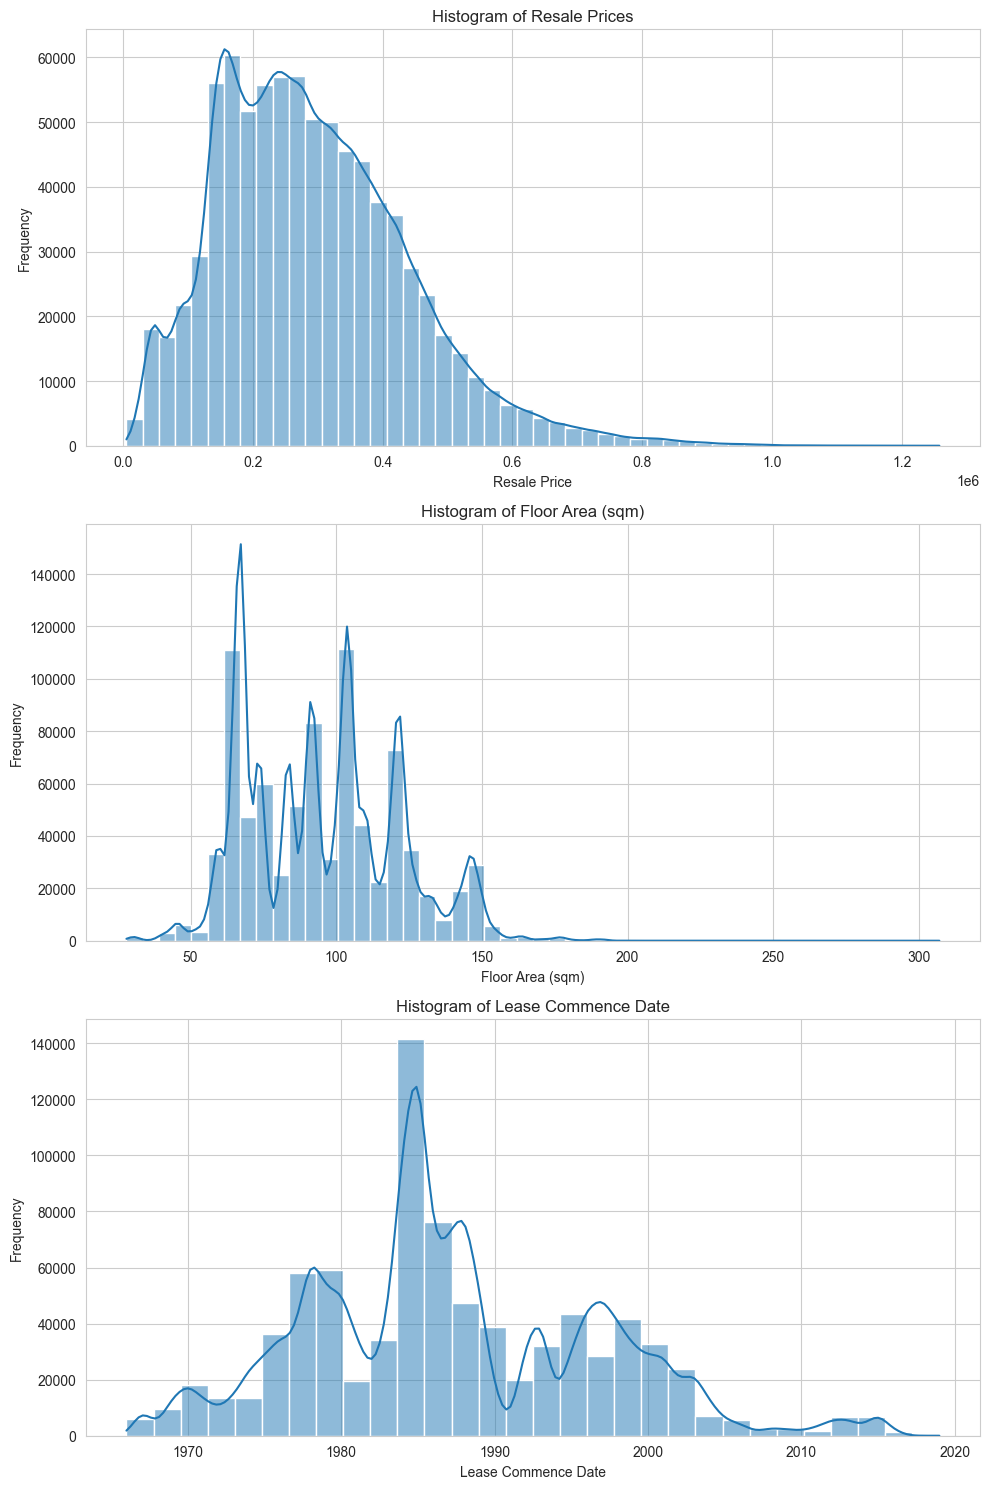

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms for key variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Histogram for resale prices
sns.histplot(data['resale_price'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Resale Prices')
axes[0].set_xlabel('Resale Price')
axes[0].set_ylabel('Frequency')

# Histogram for floor area in square meters
sns.histplot(data['floor_area_sqm'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Histogram of Floor Area (sqm)')
axes[1].set_xlabel('Floor Area (sqm)')
axes[1].set_ylabel('Frequency')

# Histogram for lease commence date
sns.histplot(data['lease_commence_date'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Histogram of Lease Commence Date')
axes[2].set_xlabel('Lease Commence Date')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BoxPlot

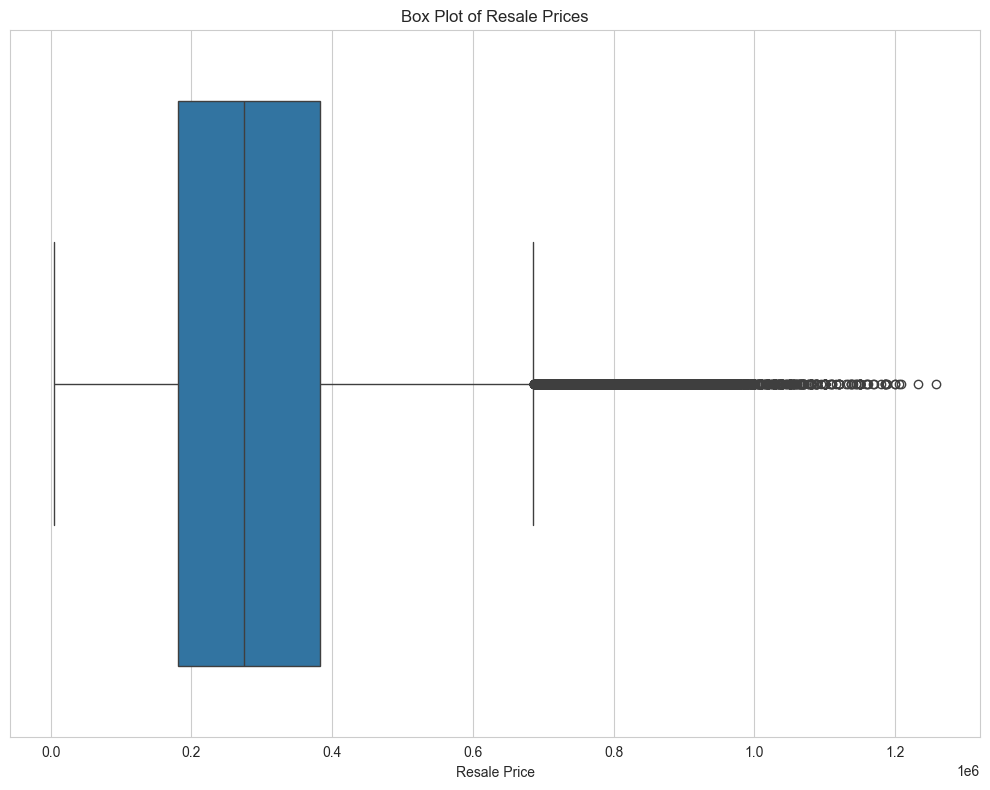

In [12]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Box Plot for resale prices
sns.boxplot(x=data['resale_price'])
plt.title('Box Plot of Resale Prices')
plt.xlabel('Resale Price')

plt.tight_layout()
plt.show()

Scatter Plots

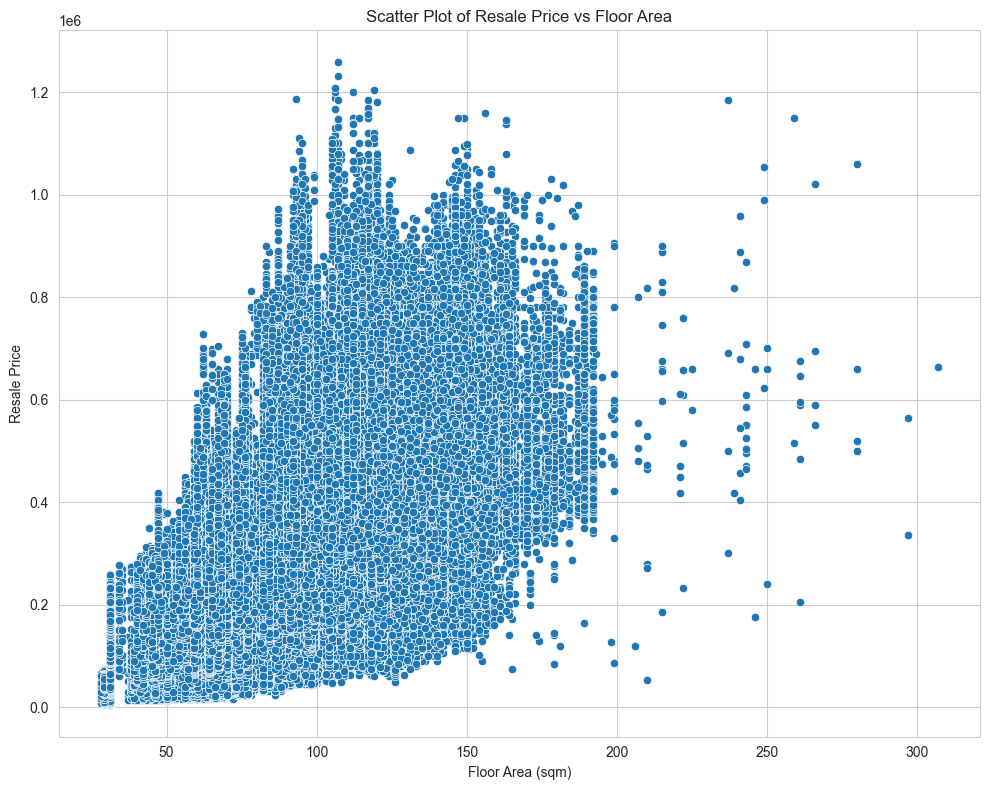

In [13]:
# Creating box plot figure
plt.figure(figsize=(10, 8))
# Scatter Plot for resale price vs floor area
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=data)
plt.title('Scatter Plot of Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

Bar Charts

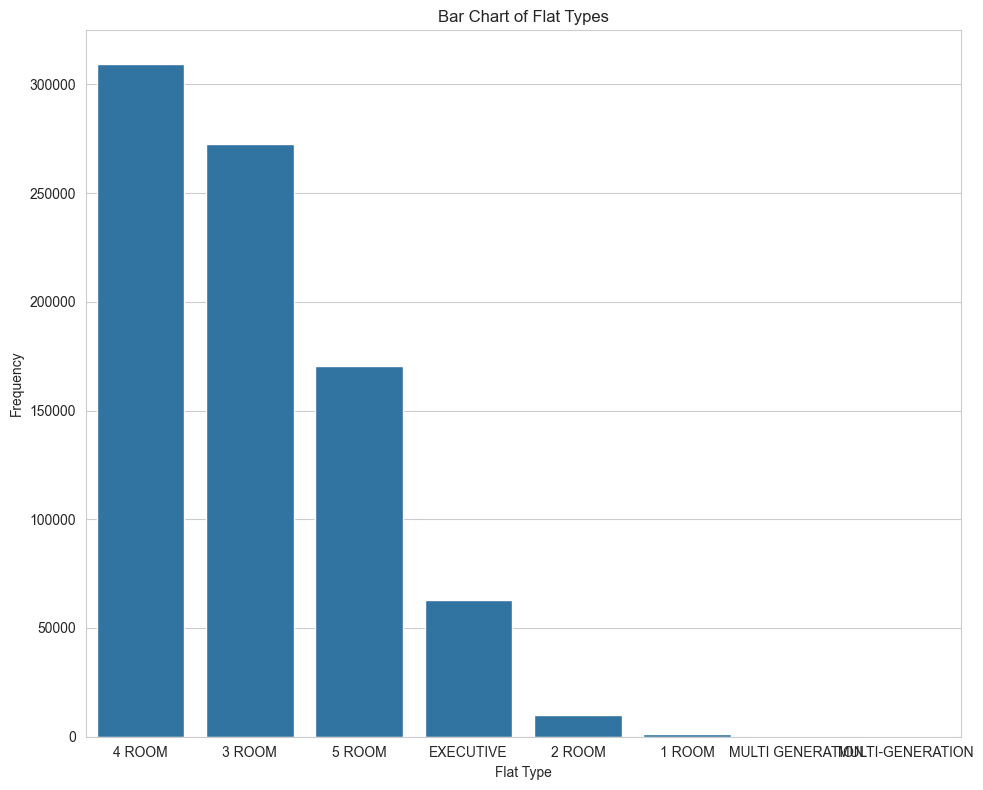

In [14]:
# Creating bar charts figure
plt.figure(figsize=(10, 8))
# Bar Chart of Flat Types
flat_type_counts = data['flat_type'].value_counts()
sns.barplot(x=flat_type_counts.index, y=flat_type_counts.values)
plt.title('Bar Chart of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Time Series Plots

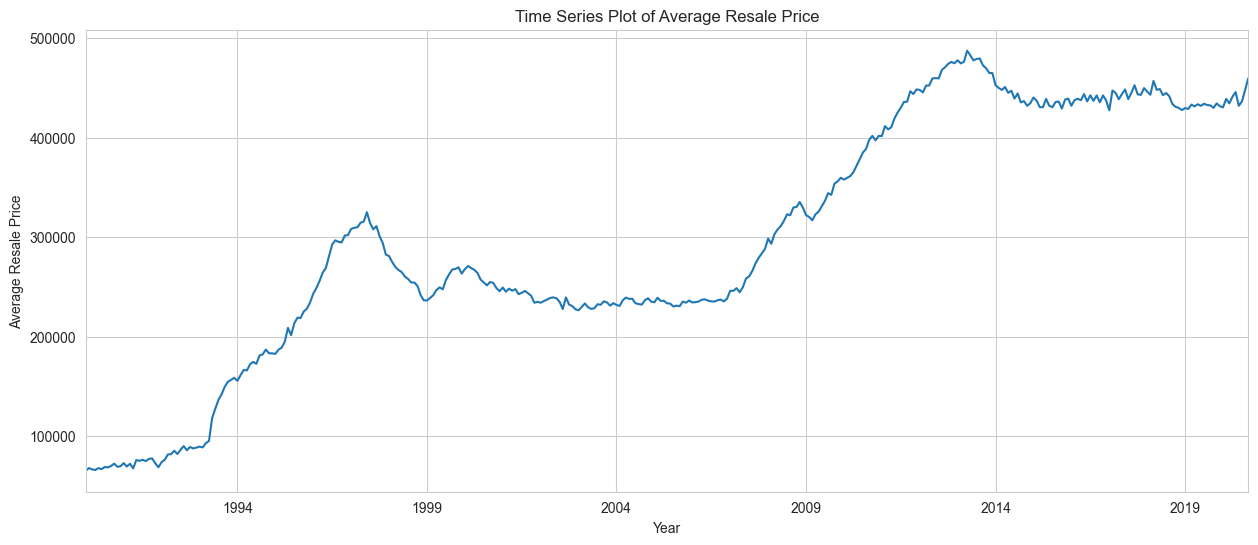

In [15]:
# Convert 'month' to datetime and set it as the index
data['month'] = pd.to_datetime(data['month'])
data.set_index('month', inplace=True)

# Group by month and calculate the average resale price
monthly_avg_price = data['resale_price'].resample('M').mean()

# Plotting the time series plot
plt.figure(figsize=(15, 6))
monthly_avg_price.plot()
plt.title('Time Series Plot of Average Resale Price')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

Heat Maps

Additional Insights

In [16]:
data.columns
data = pd.read_csv('Singapore Flat Resale Price(1990-2018).csv')

In [19]:
#Unique Value
data['month'].unique()


array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [20]:
data['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [21]:
data['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [22]:
data['block'].unique()


array(['309', '216', '211', ..., '473A', '294A', '164A'], dtype=object)

In [23]:
data['street_name'].unique()


array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [24]:
data['storey_range'].unique()


array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [25]:
data['floor_area_sqm'].unique()


array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [26]:
data['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [27]:
data['lease_commence_date'].unique()


array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [28]:
data['resale_price'].unique()

array([  9000.,   6000.,   8000., ..., 822888., 671300., 459988.])

Pre-Processing

In [17]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


Data Transformation

Label Encoding

In [9]:
from sklearn import preprocessing


# Creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder() 

# Assigning numerical values and storing in another column
data['flat_type_encoded'] = labelencoder.fit_transform(data_encoded['flat_type'])
data['storey_range_encoded'] = labelencoder.fit_transform(data_encoded['storey_range'])

# Display the first few rows of the updated dataset
print(data.head())

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

   flat_type_encoded  storey_range_encoded  
0                  0                     5  
1                  0                  

Data Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be normalized
numerical_columns = ['floor_area_sqm', 'lease_commence_date','resale_price']

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit and transform the data
data[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

# Display the first few rows to see the normalized data
print(data.head())

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0        0.010753        IMPROVED             0.207547        9000.0   
1        0.010753        IMPROVED             0.207547        6000.0   
2        0.010753        IMPROVED             0.207547        8000.0   
3        0.010753        IMPROVED             0.207547        6000.0   
4        0.161290  NEW GENERATION             0.188679       47200.0   

   flat_type_encoded  storey_range_encoded  
0                  0                     5  
1                  0                  

Output the Dataset

In [11]:
# Write the DataFrame to a new CSV file
data.to_csv('processed_dataset.csv', index=False)

Sem 2

In [8]:
import pandas as pd
df = pd.read_csv('processed_dataset.csv')

In [9]:
# reimport library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Linear Regression

In [10]:
# define features and target variable
X = df.drop('resale_price', axis=1)
y = df['resale_price']

# Preprocessing for categorical features: One-hot encoding
categorical_features = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Compute R-squared on training and test data
train_r2 = model_pipeline.score(X_train, y_train)
test_r2 = model_pipeline.score(X_test, y_test)

print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

# calculate and print RMSE for test data
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False for RMSE
print(f'Test RMSE: {rmse}')

Mean Squared Error: 1519267370.2824163
Training R-squared: 0.9320968260690415
Test R-squared: 0.9313193068313901
Test RMSE: 38977.78046890839


Random Forest

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features and target variable
X = df.drop(columns=['resale_price', 'month', 'block', 'street_name'])
y = df['resale_price']

# Identifying categorical columns for one-hot encoding
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Preprocessing for numerical data
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ])

# Random Forest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=10, random_state=0))])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting model
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mae, mse, r2, rmse


(69378.12795175191, 7326590178.204338, 0.6687908252068469, 85595.50325925036)

ARIMA

ADF Statistic: -1.3009281040526572
p-value: 0.6287475980471109
Differenced ADF Statistic: -4.129134704446524
Differenced p-value: 0.0008665279007413823


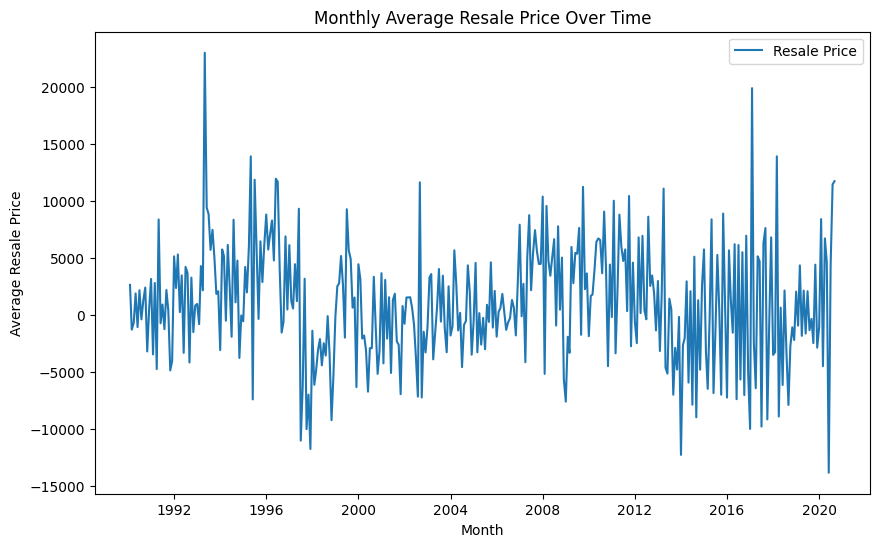

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df['month'] = pd.to_datetime(df['month'])
df.sort_values('month', inplace=True)

monthly_data = df.groupby('month')['resale_price'].mean().reset_index()
monthly_data.set_index('month', inplace=True)
monthly_data.head()
result = adfuller(monthly_data['resale_price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    monthly_data_diff = monthly_data.diff().dropna()
    result_diff = adfuller(monthly_data_diff['resale_price'])
    print(f'Differenced ADF Statistic: {result_diff[0]}')
    print(f'Differenced p-value: {result_diff[1]}')
    series_to_model = monthly_data_diff if result_diff[1] <= 0.05 else monthly_data
else:
    series_to_model = monthly_data

plt.figure(figsize=(10, 6))
plt.plot(series_to_model, label='Resale Price')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.title('Monthly Average Resale Price Over Time')
plt.legend()
plt.show()

In [15]:
# Fit the ARIMA model
model = ARIMA(series_to_model['resale_price'], order=(1, 1, 2))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

model_summary

C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gtyz0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           resale_price   No. Observations:                  368
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3640.894
Date:                Mon, 11 Mar 2024   AIC                           7289.788
Time:                        11:21:51   BIC                           7305.410
Sample:                    02-01-1990   HQIC                          7295.995
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0628      0.241     -0.261      0.794      -0.534       0.409
ma.L1         -0.9848      0.235     -4.185      0.000      -1.446      -0.524
ma.L2          0.1636      0.207      0.791      0.429      -0.242       0.569
sigma2      2.578e+07   1.07e-08    2.4e+15      0.000    2.58e+07    2.58e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.32
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.53e+30. Standard errors may be unstable.
"""

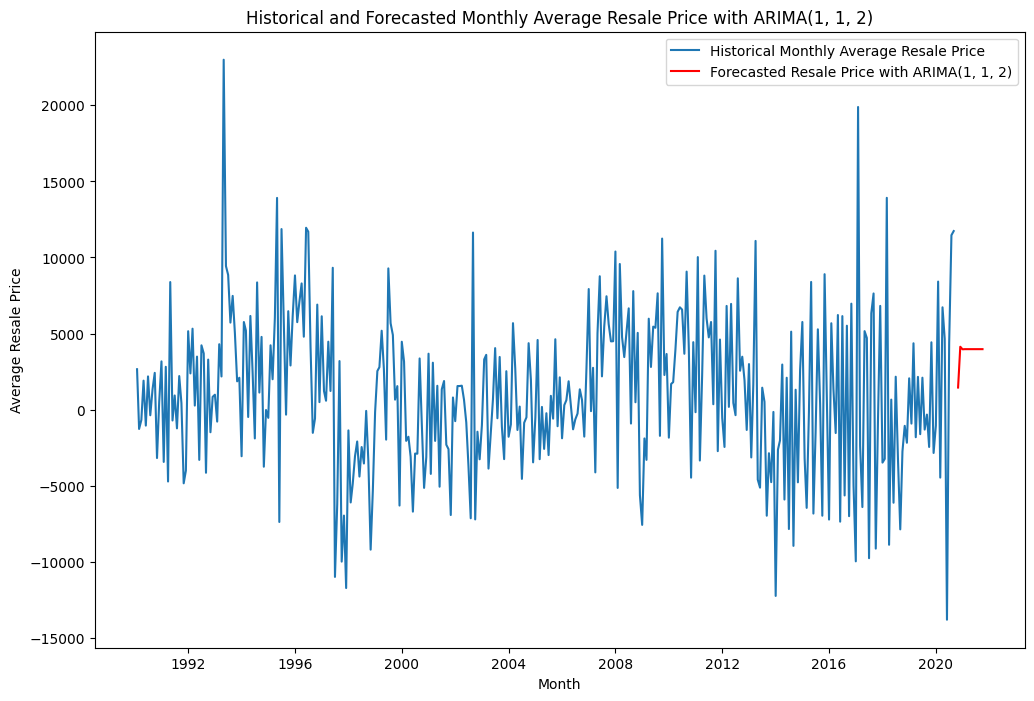

,Forecasted Resale Price
2020-10-31,1453.331852
2020-11-30,4134.744027
2020-12-31,3966.333130
2021-01-31,3976.910478
2021-02-28,3976.246149
2021-03-31,3976.287873
2021-04-30,3976.285252
2021-05-31,3976.285417
2021-06-30,3976.285407
2021-07-31,3976.285407


In [16]:
forecast_112 = model_fit.forecast(steps=12)

forecast_dates = pd.date_range(start=series_to_model.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df_112 = pd.DataFrame({'Forecasted Resale Price': forecast_112.values}, index=forecast_dates)

# Plotting the historical data and the ARIMA(1, 1, 2) forecast
plt.figure(figsize=(12, 8))
plt.plot(series_to_model['resale_price'], label='Historical Monthly Average Resale Price')
plt.plot(forecast_df_112['Forecasted Resale Price'], label='Forecasted Resale Price with ARIMA(1, 1, 2)', color='red')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.title('Historical and Forecasted Monthly Average Resale Price with ARIMA(1, 1, 2)')
plt.legend()
plt.show()

forecast_df_112